In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('thomas')
import pandas as pd
from astropy.io import fits
plt.style.use('thomas')

In [688]:
n_e = 100
ee_edges = np.arange(n_e+1)+1750
ee = np.arange(n_e)+1750.5
dee = np.repeat(1,n_e)

on_spec = np.array([33.,30.,33.,28.,19.,27.,33.,43.,25.,33.,33.,29.,29.,27.,42.,35.,23.,27.
,38.,28.,38.,30.,25.,40.,30.,20.,28.,26.,31.,33.,36.,46.,23.,29.,33.,24.
,34.,22.,29.,28.,29.,30.,27.,36.,38.,22.,28.,27.,33.,31.,24.,32.,31.,33.
,24.,28.,37.,39.,45.,35.,33.,34.,44.,33.,39.,36.,33.,31.,28.,24.,34.,28.
,25.,29.,22.,29.,28.,19.,31.,29.,25.,24.,24.,22.,23.,21.,29.,26.,23.,24.
,24.,12.,12.,23.,25.,21.,23.,29.,25.,17.])

tobs_onGP = 155748.32834148407
tobs_offGP = 1356479.420244217

In [62]:
df = pd.read_table('on_spec_y_model_sky_bg.txt',sep=' ',header=None)

In [66]:
bg_med = df[2].values
sky_med = df[1].values

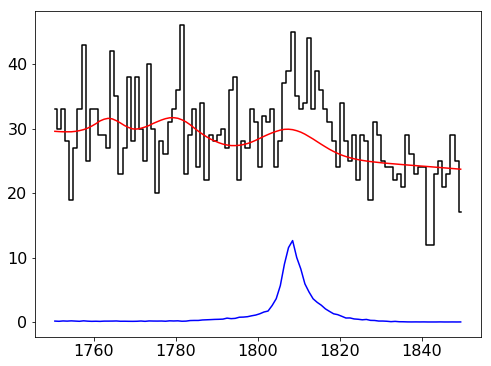

In [73]:
plt.step(ee,on_spec,where='mid')
plt.plot(ee,bg_med)
plt.plot(ee,sky_med)


In [655]:
ebin_edges = np.array([1750,1760,1770,1780,1790,1800,1805,1810,1813,1817,1821,1825,1835,1845,1850])
ebin_min = ebin_edges[0:-1]
ebin_max = ebin_edges[1:]
ebin_cen = 0.5*(ebin_max+ebin_min)
ebin_wid = (ebin_max-ebin_min)
n_ebin = len(ebin_cen)

In [656]:
r_spec = np.zeros(n_ebin)
r_bg_spec = np.zeros(n_ebin)
r_sky_spec = np.zeros(n_ebin)
for i in range(n_ebin):
    idx = np.where((ee >= ebin_min[i]) & (ee <= ebin_max[i]))[0]
    r_spec[i] = np.sum(on_spec[idx])
    r_bg_spec[i] = np.sum(bg_med[idx])
    r_sky_spec[i] = np.sum(sky_med[idx])
    

In [657]:
from COSIpy_tools import step_plot

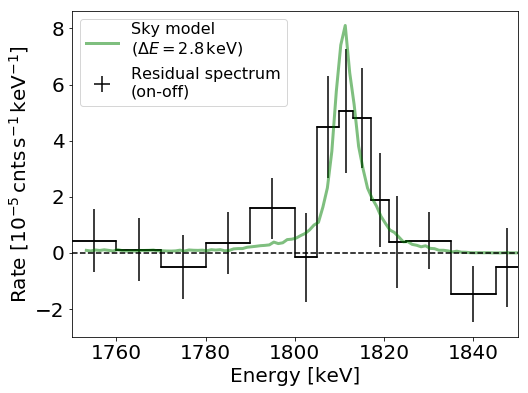

In [694]:
o = 1e5

resi_rate = (r_spec-r_bg_spec)/ebin_wid/tobs_onGP*o
resi_rate_err = np.sqrt(r_bg_spec+r_sky_spec)/ebin_wid/tobs_onGP*o
sky_model = sky_med/tobs_onGP*o

bg_spec = r_bg_spec/ebin_wid/tobs_offGP*o
bg_spec_fine = full_off_spec/tobs_offGP*o


step_plot(ebin_edges,resi_rate,color='black')
plt.errorbar(ebin_cen,resi_rate,
             xerr=ebin_wid/2,
             yerr=resi_rate_err,linestyle='',color='black',
             label='Residual spectrum\n(on-off)')
#plt.plot(ee,sky_model,color='lime',linewidth=3,label='Sky model')
plt.plot(ee+2.8,sky_model,color='green',linewidth=3,label='Sky model\n'+r'($\Delta E = 2.8\,$keV)',alpha=0.5)
#plt.plot(ebin_cen,r_sky_spec/ebin_wid,color='red')

#ch = np.where((full_ee > 1720) & (full_ee < 1870))[0]
#step_plot(full_ee_edges[ch],bg_spec_fine[ch]*10-12,color='gray')

plt.axhline(0,linestyle='--',color='black')

plt.xlim(1750,1850)
#plt.ylim(-2.5,9)

plt.xlabel('Energy [keV]',fontsize=20)
plt.ylabel(r'Rate [$10^{-5}\,\mathrm{cnts\,s^{-1}\,keV^{-1}}$]',fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend()

#plt.savefig('Residual_spectrum_COSI_1750-1850keV_shift.pdf')

In [698]:
binsize = 1
l_arrg = np.linspace(-180,180,int(360/binsize)+1)
b_arrg = np.linspace(-90,90,int(180/binsize)+1)
L_ARRg, B_ARRg = np.meshgrid(l_arrg,b_arrg)
l_arr = l_arrg[0:-1]+binsize/2
b_arr = b_arrg[0:-1]+binsize/2
L_ARR, B_ARR = np.meshgrid(l_arr,b_arr)
domega = (binsize*np.pi/180)*(np.sin(np.deg2rad(B_ARR+binsize/2)) - np.sin(np.deg2rad(B_ARR-binsize/2)))

In [703]:
with fits.open('/Users/thomassiegert/python/COSIpy/COSIpy/maps/SPI_26Al_3deg_map.fits') as f:
    spi_map = f[2].data

In [704]:
spi_map.shape

(180, 360)

In [708]:
from matplotlib import colors

In [779]:
deg2rad = np.pi/180

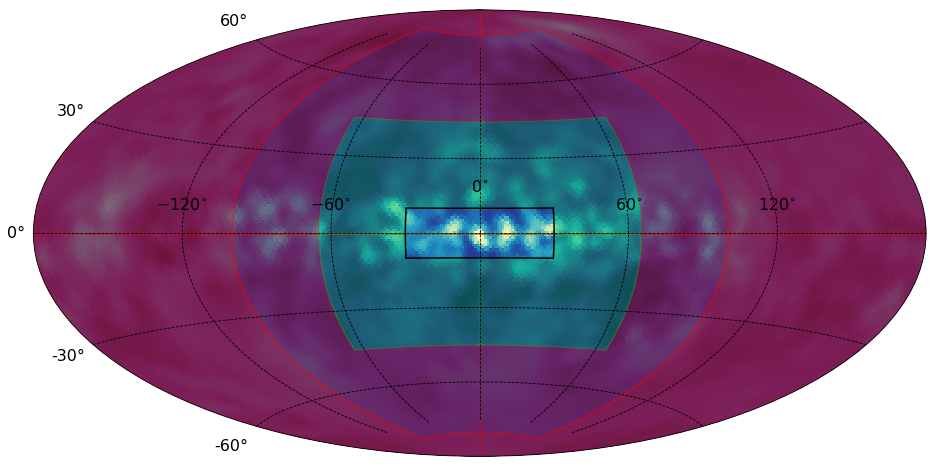

In [853]:
plt.figure(figsize=(16,12))
plt.subplot(projection='aitoff')
plt.pcolormesh(deg2rad*L_ARRg,deg2rad*B_ARRg,spi_map,cmap=plt.cm.YlGnBu_r,
               norm=colors.PowerNorm(0.5),alpha=1,rasterized=True)#,
               #edgecolor='face',linewidth=0.1)

plt.plot(np.deg2rad([-30,-30,30,30,-30]),np.deg2rad([-10,10,10,-10,-10]))#,color='lime',linewidth=2,alpha=0.5)

# all
#plt.fill_between(deg2rad*np.array([-100,-100,100,100,-100]),deg2rad*np.array([-80,80,80,-80,-80]),color='red',alpha=0.1)
# left
plt.fill_between(deg2rad*np.array([-180,-180,0,0,-100,-100,0,0,-180]),
                 deg2rad*np.array([-90,90,90,80,80,-80,-80,-90,-90]),color='red',alpha=0.4)
plt.fill_between(deg2rad*np.array([-100,-100,0,0,-100+35,-100+35,0,0,-100]),
                 deg2rad*np.array([-80,80,80,80-35,80-35,-80+35,-80+35,-80,-80]),color='red',alpha=0.3)

plt.fill_between(deg2rad*np.array([-65,-65,0,0,-65+35,-65+35,0,0,-65]),
                 deg2rad*np.array([-45,45,45,45-35,45-35,-45+35,-45+35,-45,-45]),color='lime',alpha=0.2)


# right
plt.fill_between(deg2rad*np.array([180,180,0,0,100,100,0,0,180]),
                 deg2rad*np.array([-90,90,90,80,80,-80,-80,-90,-90]),color='red',alpha=0.4)
plt.fill_between(deg2rad*np.array([100,100,0,0,100-35,100-35,0,0,100]),
                 deg2rad*np.array([-80,80,80,80-35,80-35,-80+35,-80+35,-80,-80]),color='red',alpha=0.3)

plt.fill_between(deg2rad*np.array([65,65,0,0,65-35,65-35,0,0,65]),
                 deg2rad*np.array([-45,45,45,45-35,45-35,-45+35,-45+35,-45,-45]),color='lime',alpha=0.2)



plt.grid(color='black',linestyle='--')

plt.xticks(np.array([-120,-60,0,60,120])*deg2rad,labels=[r'$-120^{\circ}$'+'\n',
                                                         r'$-60^{\circ}$'+'\n',
                                                         r'$0^{\circ}$'+'\n\n',
                                                         r'$60^{\circ}$'+'\n',
                                                         r'$120^{\circ}$'+'\n'],color='black')
plt.yticks(np.array([-60,-30,0,30,60])*deg2rad)

plt.savefig('COSI_selection_on_SPI_26Al.pdf')

In [697]:
np.loadtxt('onGP_l_exp.txt',delimiter=' ')

ValueError: could not convert string to float: '[-17.708'

In [586]:
df2 = pd.read_table('full_flight_spectrum.txt',skiprows=3,header=None,sep=' ')

In [587]:
df2

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
4994,0.0,0.0,0.0,0.0,-0.0
4995,0.0,0.0,0.0,0.0,-0.0
4996,0.0,0.0,0.0,0.0,-0.0
4997,0.0,0.0,0.0,0.0,-0.0


In [588]:
full_on_spec = df2[0].values
full_off_spec = df2[0].values

full_tobs_onGP = 155748.32834148407
full_tobs_offGP = 1356479.420244217

In [690]:
full_ee_edges = np.arange(5000)
full_ee = np.arange(4999)+0.5

In [590]:
fac = 7
full_diff_spec = full_on_spec/full_tobs_onGP-fac*full_off_spec/full_tobs_offGP
full_diff_spec_err = np.sqrt((np.sqrt(full_on_spec)/full_tobs_onGP)**2 + (fac*np.sqrt(full_off_spec)/full_tobs_offGP)**2)

(0, 0.0011)

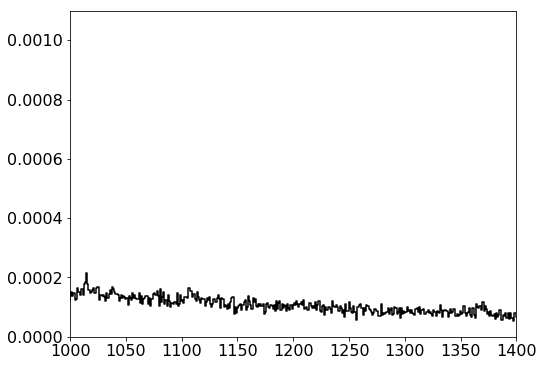

In [591]:
plt.step(full_ee,full_diff_spec)
#plt.step(full_ee,full_off_spec/full_tobs_offGP)
#plt.xscale('log')
#plt.yscale('log')
plt.xlim(1000,1400)
plt.ylim(0,1.1e-3)

/Users/thomassiegert/.virtualenvs/testing/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


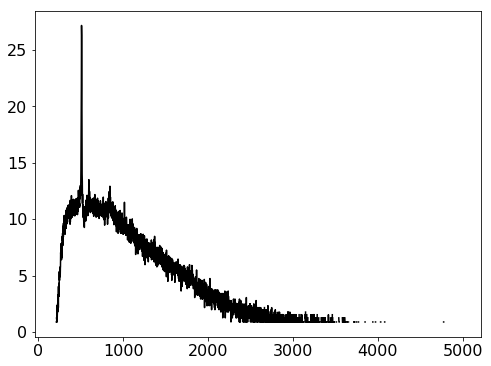

In [482]:
plt.plot(full_ee,full_diff_spec/full_diff_spec_err)

(100, 7921.969774250769)

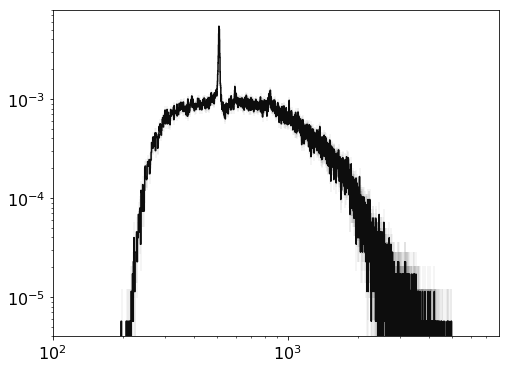

In [483]:
plt.step(full_ee,full_diff_spec)
plt.errorbar(full_ee,full_diff_spec,yerr=full_diff_spec_err,color='gray',alpha=0.1)
plt.xscale('log')
plt.yscale('log')
plt.xlim(100,)

In [538]:
full_ebin_edges = np.concatenate([np.array([0]),
                            np.logspace(np.log10(150),np.log10(380),20),
                            np.array([400,450,480,490,500,505,507,509,511,513,515,517,520,525,530]),
                            np.logspace(np.log10(540),np.log10(1150),30),
                            np.array([1167,1179]),
                            np.logspace(np.log10(1190),np.log10(1310),5),
                            np.array([1324,1338]),
                            np.logspace(np.log10(1350),np.log10(1730),10),
                            np.array([1750,1760,1770,1780,1790,1800,1805,1810,1814,1817,1821,1830,1840,1850]),
                            np.logspace(np.log10(1870),np.log10(5000),80)])
full_ebin_min = full_ebin_edges[0:-1]
full_ebin_max = full_ebin_edges[1:]
full_ebin_cen = 0.5*(full_ebin_max+full_ebin_min)
full_ebin_wid = (full_ebin_max-full_ebin_min)
n_full_ebin = len(full_ebin_cen)

In [539]:
r_full_spec = np.zeros(n_full_ebin)
r_full_spec_err = np.zeros(n_full_ebin)
#r_bg_spec = np.zeros(n_ebin)
#r_sky_spec = np.zeros(n_ebin)
for i in range(n_full_ebin):
    idx = np.where((full_ee >= full_ebin_min[i]) & (full_ee <= full_ebin_max[i]))[0]
    r_full_spec[i] = np.sum(full_diff_spec[idx])
    r_full_spec_err[i] = np.sqrt(np.sum(full_diff_spec_err[idx]**2))
    #r_bg_spec[i] = np.sum(bg_med[idx])
    #r_sky_spec[i] = np.sum(sky_med[idx])
    

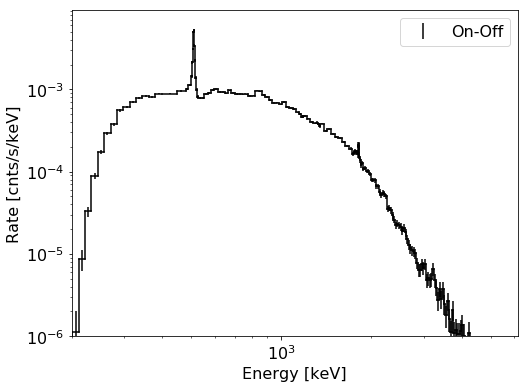

In [540]:
step_plot(full_ebin_edges,r_full_spec/full_ebin_wid,color='black')
plt.errorbar(full_ebin_cen,r_full_spec/full_ebin_wid,yerr=r_full_spec_err/full_ebin_wid,linestyle='',color='black',
             label='On-Off',alpha=1.0)
plt.xscale('log')
plt.yscale('log')
plt.xlim(200,)
plt.ylim(1e-6)
#for edge in full_ebin_edges:
#    plt.axvline(edge,color='red')
plt.xlabel('Energy [keV]')
plt.ylabel('Rate [cnts/s/keV]')
plt.legend()

No handles with labels found to put in legend.


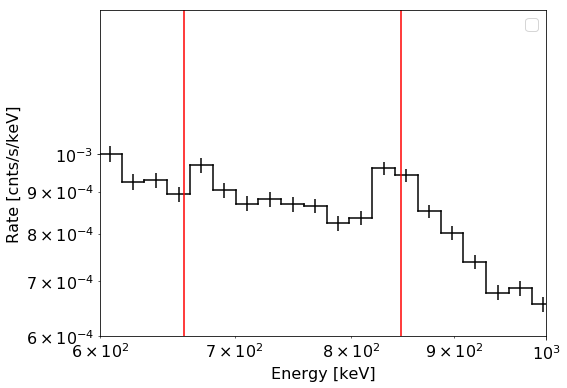

In [541]:
step_plot(full_ebin_edges,r_full_spec/full_ebin_wid,color='black')
plt.errorbar(full_ebin_cen,r_full_spec/full_ebin_wid,yerr=r_full_spec_err/full_ebin_wid,linestyle='',color='black')
plt.xscale('log')
plt.yscale('log')
plt.xlim(600,1000)
plt.ylim(6e-4,1.5e-3)
#for edge in full_ebin_edges:
#    plt.axvline(edge,color='red')

plt.axvline(661,color='red')
plt.axvline(847,color='red')

plt.xlabel('Energy [keV]')
plt.ylabel('Rate [cnts/s/keV]')
plt.legend()

Text(0.5, 0, 'Energy [keV]')

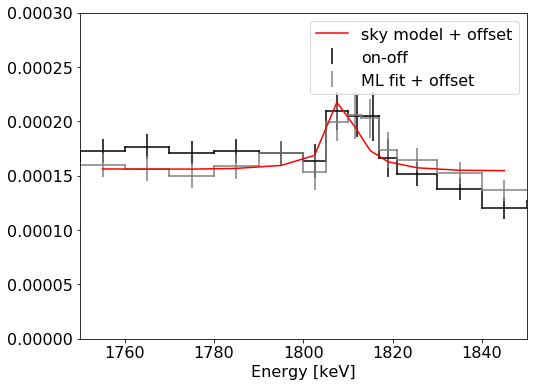

In [542]:
step_plot(full_ebin_edges,r_full_spec/full_ebin_wid,color='black')
plt.errorbar(full_ebin_cen,r_full_spec/full_ebin_wid,yerr=r_full_spec_err/full_ebin_wid,linestyle='',color='black',label='on-off')
#plt.xscale('log')
#plt.yscale('log')
plt.xlim(1750,1850)
plt.ylim(0,3e-4)
#for edge in full_ebin_edges:
#    plt.axvline(edge,color='red')

plt.axvline(661,color='red')
plt.axvline(847,color='red')

offset = 1.7e-4 - ebin_cen/1800*1.5e-5

step_plot(ebin_edges,offset+(r_spec-r_bg_spec)/ebin_wid/tobs_onGP,color='gray')
plt.errorbar(ebin_cen,offset+(r_spec-r_bg_spec)/ebin_wid/tobs_onGP,
             yerr=np.sqrt(r_bg_spec+r_sky_spec)/ebin_wid/tobs_onGP,linestyle='',color='gray',label='ML fit + offset')
#plt.plot(ee,sky_med)
plt.plot(ebin_cen,offset+r_sky_spec/ebin_wid/tobs_onGP,color='red',label='sky model + offset')

plt.legend()

plt.xlabel('Energy [keV]')

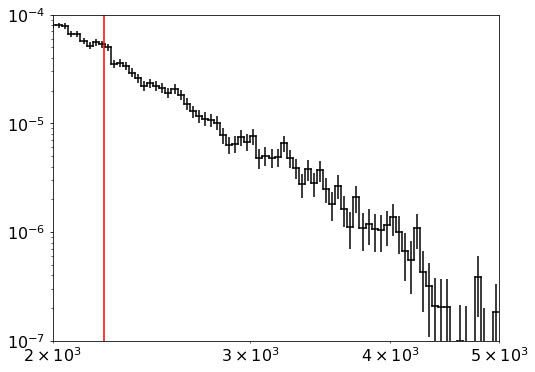

In [543]:
step_plot(full_ebin_edges,r_full_spec/full_ebin_wid,color='black')
plt.errorbar(full_ebin_cen,r_full_spec/full_ebin_wid,yerr=r_full_spec_err/full_ebin_wid,linestyle='',color='black')
plt.xscale('log')
plt.yscale('log')
plt.xlim(2000,5000)
plt.ylim(1e-7,1e-4)
#for edge in full_ebin_edges:
#    plt.axvline(edge,color='red')

plt.axvline(661,color='red')
plt.axvline(847,color='red')
plt.axvline(2223,color='red')

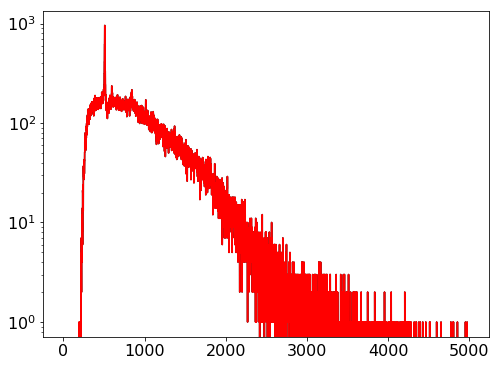

In [179]:
plt.step(full_ee,full_on_spec)
plt.step(full_ee,full_off_spec)
plt.yscale('log')

(0.0003, 0.0011)

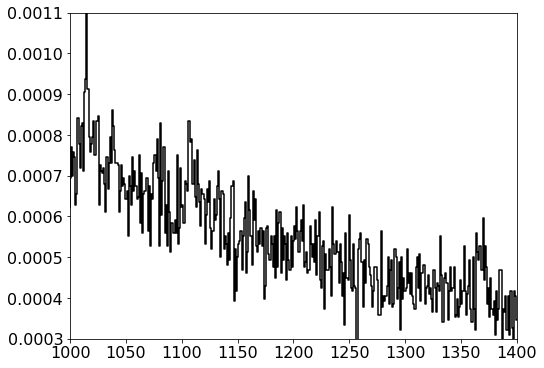

In [551]:
plt.step(full_ee,full_on_spec/full_tobs_onGP)
#plt.step(full_ee,full_off_spec/full_tobs_offGP)
#plt.xscale('log')
#plt.yscale('log')
plt.xlim(1000,1400)
plt.ylim(3e-4,1.1e-3)

(0.0003, 0.0011)

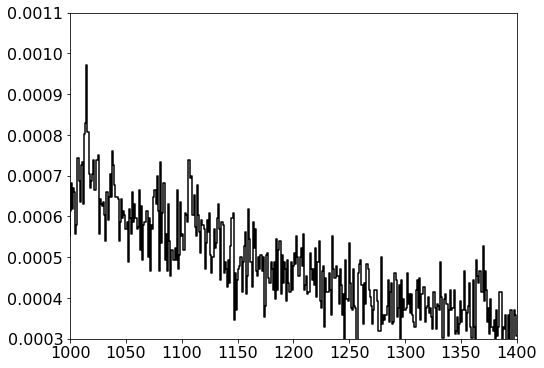

In [552]:
plt.step(full_ee,full_diff_spec)
#plt.step(full_ee,full_off_spec/full_tobs_offGP)
#plt.xscale('log')
#plt.yscale('log')
plt.xlim(1000,1400)
plt.ylim(3e-4,1.1e-3)